<a href="https://colab.research.google.com/github/mattematica/passion-stats-python/blob/main/unit4_chisquare_bonfadjustment_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Header Block

In [1]:
# This header will be the same no matter what code you are using
# import modules that we will use multiple functions from and give them short names. 

import pandas as pd;
import numpy as np;
import seaborn as sb;
import matplotlib.pyplot as plt;


# import single functions

from scipy.stats.contingency import chi2_contingency;
from itertools import combinations;
from statsmodels.graphics.mosaicplot import mosaic;
from scipy.stats.contingency import chi2_contingency;
from scipy.stats import pearsonr;
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi

# Data Management Block

In [4]:
# Import Variables
addhealth_url = 'https://drive.google.com/uc?export=download&id=1LOoZl4utpqTfKjj6nu70RH16frFLyPfm'
myData = pd.read_csv(addhealth_url, usecols=['H4MH8','H4TO65B'],low_memory=False)

# Rename Variables
myData.rename(columns={
    'H4MH8':'ATTRACTIVENESS',
    'H4TO65B':'MJ'
},inplace=True)

# Deal with non-responses and legit skips.

myData['MJ'].replace({
    8:np.nan,
    6:np.nan,
}, inplace=True)

myData['ATTRACTIVENESS'].replace({
    8:np.nan,
    6:np.nan,
}, inplace=True)

#Collapse/Create Secondary Variables/Deal with Time


# Text Labels

myData['ATTRACTIVENESS'].replace({
    1:'very',
    2:'moderately',
    3:'slightly',
    4:'not at all'
},inplace=True)

myData['MJ'].replace({
    0:'no',
    1:'yes',
},inplace=True)

# Everything Else

In [5]:
pd.crosstab(myData['MJ'], myData['ATTRACTIVENESS'], normalize='columns')

ATTRACTIVENESS,moderately,not at all,slightly,very
MJ,,,,
no,0.424642,0.508929,0.474801,0.487269
yes,0.575358,0.491071,0.525199,0.512731


(<Figure size 432x288 with 3 Axes>,
 {('no', 'moderately'): (0.0, 0.0, 0.44987304346971957, 0.47386398028449134),
  ('no', 'very'): (0.0,
   0.4771643103174946,
   0.44987304346971957,
   0.182022569069134),
  ('no', 'slightly'): (0.0,
   0.6624872094196319,
   0.44987304346971957,
   0.3095680747114013),
  ('no', 'not at all'): (0.0,
   0.9753556141640365,
   0.44987304346971957,
   0.024644385835963466),
  ('yes', 'moderately'): (0.454848167847829,
   0.0,
   0.5451518321521711,
   0.5298367674605298),
  ('yes', 'very'): (0.454848167847829,
   0.5331370974935331,
   0.5451518321521711,
   0.1580590491481581),
  ('yes', 'slightly'): (0.454848167847829,
   0.6944964766746945,
   0.5451518321521711,
   0.28257960931228254),
  ('yes', 'not at all'): (0.454848167847829,
   0.9803764160199804,
   0.5451518321521711,
   0.019623583980019642)})

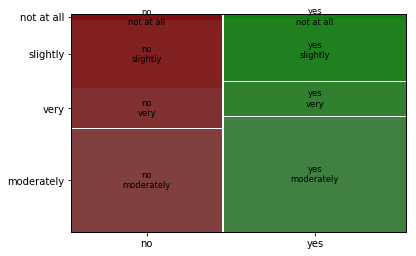

In [7]:
mosaic(data=myData, index=['MJ','ATTRACTIVENESS'],axes_label=True)

In [8]:
ct = pd.crosstab(myData['MJ'], myData['ATTRACTIVENESS'])
ts, pval, degfree, expected = chi2_contingency(ct)
print(f"Test Stat = {ts}, P-Value={pval}")

Test Stat = 16.767442260860335, P-Value=0.0007889924650153877


In [9]:
levels = ['very','moderately','slightly','not at all']

for comb in combinations(levels,2):
  df = myData[(myData['ATTRACTIVENESS']== comb[0]) | (myData['ATTRACTIVENESS']==comb[1])]
  ct = pd.crosstab(df['MJ'], df['ATTRACTIVENESS'])
  print(pd.crosstab(df['MJ'], df['ATTRACTIVENESS'],normalize='columns'))
  test_stat, pval, degfree, expected = chi2_contingency(ct)
  print(f"Testing {comb}:  p-value = {pval} and test-stat={test_stat}\n")

ATTRACTIVENESS  moderately      very
MJ                                  
no                0.424642  0.487269
yes               0.575358  0.512731
Testing ('very', 'moderately'):  p-value = 0.0015239652429195525 and test-stat=10.049412629489401

ATTRACTIVENESS  slightly      very
MJ                                
no              0.474801  0.487269
yes             0.525199  0.512731
Testing ('very', 'slightly'):  p-value = 0.5876860079023631 and test-stat=0.29397253944714397

ATTRACTIVENESS  not at all      very
MJ                                  
no                0.508929  0.487269
yes               0.491071  0.512731
Testing ('very', 'not at all'):  p-value = 0.7406511306065162 and test-stat=0.10955517627393484

ATTRACTIVENESS  moderately  slightly
MJ                                  
no                0.424642  0.474801
yes               0.575358  0.525199
Testing ('moderately', 'slightly'):  p-value = 0.0020517079357272616 and test-stat=9.502690853012242

ATTRACTIVENESS  moderat